좋아하는 색과 성별의 관계


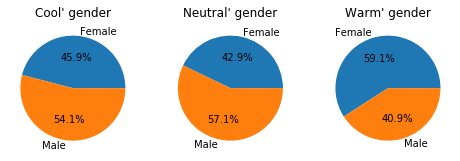

좋아하는 음악과 성별의 관계


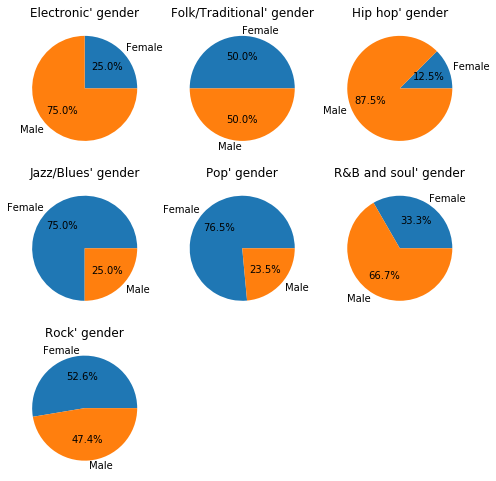

좋아하는 술과 성별의 관계


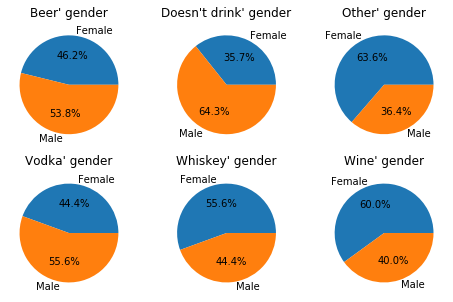

좋아하는 음료와 성별의 관계


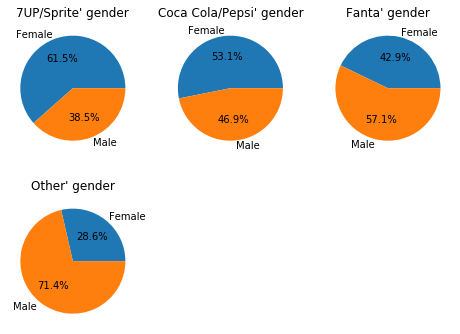

Gender,Female,Male
Favorite Soft Drink,,
7UP/Sprite,8,5
Coca Cola/Pepsi,17,15
Fanta,6,8
Other,2,5


In [1]:
import random as rd
import pandas as pd 
import matplotlib.pyplot as plt

train = pd.read_csv(r'C:\Users\ssjy1\kaggle\datasets\datasets_gender_classification.csv')

def show_pie_chart(df, col_name):
    colname_gender = gender_crosstab(train, col_name)
    pie_chart(colname_gender)
    return colname_gender

def gender_crosstab(df, col_name):
    feature_gender = pd.crosstab(df[col_name], df['Gender'])
    feature_gender.columns = feature_gender.columns.map({"F":"Female", "M":"Male" })
    return feature_gender

def pie_chart(feature_gender):
    frows, fcols = feature_gender.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_gender.index[row]
        plt.pie(feature_gender.loc[index_name], labels=feature_gender.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' gender".format(index_name))

    plt.show()

# Favorite Color
print('좋아하는 색과 성별의 관계')
c = show_pie_chart(train, 'Favorite Color')
c

# Favorite Music Genre
print('좋아하는 음악과 성별의 관계')
c = show_pie_chart(train, 'Favorite Music Genre')
c

# Favorite Beverage
print('좋아하는 술과 성별의 관계')
c = show_pie_chart(train, 'Favorite Beverage')
c

# Favorite Soft Drink
print('좋아하는 음료와 성별의 관계')
c = show_pie_chart(train, 'Favorite Soft Drink')
c


In [2]:
train.head(10)

def feature_engineering(df):
    df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
    df['Favorite Color'] = df['Favorite Color'].map({'Cool': 0, 'Neutral': 1, 'Warm': 2})
    df['Favorite Music Genre'] = df['Favorite Music Genre'].map({'Electronic': 0, 'Folk/Traditional': 1, 'Hip hop': 2, 'Jazz/Blues': 3, 'Pop': 4, 'R&B and soul': 5, 'Rock': 6})
    df['Favorite Beverage'] = df['Favorite Beverage'].map({'Vodka': 0, 'Wine': 1, 'Whiskey': 2, 'Beer': 3, 'Doesn\'t drink': 4, 'Other': 5})
    df['Favorite Soft Drink'] = df['Favorite Soft Drink'].map({'7UP/Sprite': 0, 'Coca Cola/Pepsi': 1, 'Fanta': 2, 'Other': 3})
    
    return df

train = feature_engineering(train)
train.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,0,0,0
1,1,2,0,1,0
2,2,6,1,1,0
3,2,1,2,2,0
4,0,6,0,1,0


In [3]:
# ========== machine learning - 랜덤 포레스트 검증 1 ==========
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Favorite ~
data = train.drop('Gender', axis=1).values
# Gender
target = train['Gender'].values

# test_size: 분리 비율 설정. 
# stratify: 분리 기준이 될 데이터 
# random_state: 랜덤 seed
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

# n_estimators=50 : 트리 갯수
rf = RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10)
rf.fit(x_train, y_train)
prediction = rf.predict(x_valid)

length = y_valid.shape[0]
accuracy = accuracy_score(prediction, y_valid)
print(f'총 {length}개 데이터 중 {accuracy * 100:.3f}% 정확도로 맞춤')
print('\n')

총 27개 데이터 중 59.259% 정확도로 맞춤




In [4]:
# ========== machine learning - 알고리즘 적용 ==========

# 지도학습 모델 import - 입력에 대한 결과값이 있어 이를 학습하고, 새로운 데이터에 대한 결과 예측.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data 분리 
data = train.drop('Gender', axis=1).values
target = train['Gender'].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

# 모델 적용 함수 
def ml_fit(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]}개 데이터 중 {accuracy * 100:.3f}% 정확도로 맞춤')
    print('\n')
    return model

# 기본 설정으로만 테스트 
#model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)
총 27개 데이터 중 59.259% 정확도로 맞춤


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
총 27개 데이터 중 40.741% 정확도로 맞춤


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0